#Задача 1

1. Разработать программу решения производственной задачи. Цех может производить стулья и столы. На производство стула идет 5 единиц материала, на производство стола – 20 единиц. Для изготовления стула требуется 10 человеко-   часов, стола – 15 Имеется 400 единиц материала и 450 человеко-часов. Прибыль при производстве стула – 45 у.е., при производстве стола – 80 у.е. Сколько надо сделать стульев и столов, чтобы получить максимальную прибыль?

Определение ограничений

In [1]:
import random

MATERIAL_LIMIT = 400
HOURS_LIMIT = 450

Функция оценки (fitness)

In [2]:
def fitness(individual):
    """Вычисляем прибыль."""
    x, y = individual
    if 5*x + 20*y > MATERIAL_LIMIT or 10*x + 15*y > HOURS_LIMIT:
        return 0  # несоответствие ограничениям
    return 45*x + 80*y  # целевая функция

Функция мутации

In [3]:
def mutate(individual):
    """Выполняем мутацию: случайное изменение количества столов или стульев."""
    x, y = individual
    if random.random() < 0.5:
        x = max(0, x + random.choice([-1, 1]))  # Изменяем количество стульев
    else:
        y = max(0, y + random.choice([-1, 1]))  # Изменяем количество столов
    return (x, y)

Функция кроссовера

In [4]:
def crossover(parent1, parent2):
    """Скrossover двух индивидов."""
    return (parent1[0], parent2[1])  # простой способ кроссовера

Генетический алгоритм

In [5]:
def genetic_algorithm(population_size, generations):
    population = [(random.randint(0, 80), random.randint(0, 20)) for _ in range(population_size)]

    for generation in range(generations):
        population = sorted(population, key=fitness, reverse=True)  # сортируем по прибыли
        new_population = population[:int(population_size / 2)]  # отбор

        while len(new_population) < population_size:
            parent1, parent2 = random.sample(new_population, 2)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)

        population = new_population

    best_solution = max(population, key=fitness)
    return best_solution, fitness(best_solution)

Запуск алгоритма

In [6]:
best_solution, best_fitness = genetic_algorithm(population_size=100, generations=200)
print(f"Лучшее решение: {best_solution}, Прибыль: {best_fitness}")


Лучшее решение: (24, 14), Прибыль: 2200


#Задача 2

2. Разработать программу решения задачи раскроя. Найти оптимальный вариант раскроя некоторого количества рулонов бумаги фиксированной ширины для различных заказчиков (которым нужны различные количества рулонов различной ширины), минимизировав при этом отходы.

Определение класса Order и класса Roll

In [7]:
class Order:
    def __init__(self, required_width, quantity):
        self.required_width = required_width
        self.quantity = quantity

class Roll:
    def __init__(self, width):
        self.width = width
        self.remaining_width = width  # оставшаяся ширина для раскроя

Функция для раскроя рулона

In [8]:
def cut_roll(orders, roll):
    used_orders = []
    for order in orders:
        while order.quantity > 0 and roll.remaining_width >= order.required_width:
            # Если есть достаточно ширины в рулоне для заказа
            roll.remaining_width -= order.required_width
            order.quantity -= 1
            used_orders.append(order.required_width)  # Запоминаем использованную ширину

    return roll.remaining_width, used_orders

Основная функция

In [11]:
def main():
    # Входные данные
    roll_width = 120  # фиксированная ширина рулонов
    orders = [Order(30, 2), Order(45, 1), Order(25, 3)]  # список заказов

    # Инициализация рулона
    roll = Roll(roll_width)

    print(f"Начальная ширина рулона: {roll.width}")

    # Вызов функции для раскроя рулона
    remaining_width, used_orders = cut_roll(orders, roll)

    print(f"Использованные ширины: {used_orders}")
    print(f"Остаточная ширина: {remaining_width}")

if __name__ == "__main__":
    main()


Начальная ширина рулона: 120
Использованные ширины: [30, 30, 45]
Остаточная ширина: 15


#Задача 3

3. Разработать программу решения транспортной задачи. Составить оптимальный план перевозок между N складами и K магазинами, при котором стоимость перевозок будет минимальна. Известна потребность в товаре каждым магазином, наличие товара на складах и стоимость перевозки единицы продукции с каждого склада до каждого магазина.

Импорт библиотек

In [12]:
import numpy as np
from scipy.optimize import linprog

Определение функции транспортной задачи


In [13]:
def transport_problem(costs, supply, demand):
    num_sources, num_dests = costs.shape

    # Проверка на соответствие запасов и потребностей
    if sum(supply) != sum(demand):
        print("Ошибка: Сумма запасов не равна сумме потребностей.")
        return None

    # Настройка коэффициентов
    c = costs.flatten()
    A_eq = []
    b_eq = []

    # Ограничения для поставок
    for i in range(num_sources):
        row = [1 if j // num_dests == i else 0 for j in range(num_sources * num_dests)]
        A_eq.append(row)
        b_eq.append(supply[i])

    # Ограничения для потребностей
    for j in range(num_dests):
        col = [1 if j % num_dests == j else 0 for j in range(num_sources * num_dests)]
        A_eq.append(col)
        b_eq.append(demand[j])

    # Преобразование в numpy массив
    A_eq = np.array(A_eq)
    b_eq = np.array(b_eq)

    print("Коэффициенты затрат:", c)
    print("Массив ограничений A_eq:", A_eq)
    print("Массив ограничений b_eq:", b_eq)

    # Решение проблемы линейного программирования
    res = linprog(c, A_eq=A_eq, b_eq=b_eq, method='highs')

    if res.success:
        optimal_cost = res.fun
        optimal_distribution = res.x.reshape((num_sources, num_dests))
        return optimal_cost, optimal_distribution
    else:
        print("Не удалось найти решение. Причина:", res.message)
        return None

Основная функция

In [14]:
def main():
    # Измените на свои данные
    supply = np.array([30, 30])
    demand = np.array([30, 30])
    costs = np.array([[1, 2],
                       [3, 4]])

    result = transport_problem(costs, supply, demand)

    if result:
        optimal_cost, optimal_distribution = result
        print(f"Минимальные транспортные затраты: {optimal_cost}")
        print("Оптимальный план перевозок:")
        print(optimal_distribution)
    else:
        print("Не удалось найти решение.")

if __name__ == "__main__":
    main()


Коэффициенты затрат: [1 2 3 4]
Массив ограничений A_eq: [[1 1 0 0]
 [0 0 1 1]
 [1 1 0 0]
 [1 1 0 0]]
Массив ограничений b_eq: [30 30 30 30]
Минимальные транспортные затраты: 120.0
Оптимальный план перевозок:
[[30.  0.]
 [30.  0.]]


#Задача 4

4. Разработать программу поиска минимального остовного дерева. Есть несколько городов, которые необходимо соединить дорогами так, чтобы можно было добраться из любого города в любой другой (напрямую или через другие города). Разрешается строить дороги между заданными парами городов, и известна стоимость строительства каждой такой дороги. Требуется решить, какие именно дороги нужно строить, чтобы минимизировать общую стоимость строительства.

Импорт библиотек

In [15]:
import matplotlib.pyplot as plt
import networkx as nx

Определение класса DisjointSet

In [16]:
class DisjointSet:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n

    def find(self, u):
        if self.parent[u] != u:
            self.parent[u] = self.find(self.parent[u])  # Path compression
        return self.parent[u]

    def union(self, u, v):
        root_u = self.find(u)
        root_v = self.find(v)

        if root_u != root_v:
            # Union by rank
            if self.rank[root_u] > self.rank[root_v]:
                self.parent[root_v] = root_u
            elif self.rank[root_u] < self.rank[root_v]:
                self.parent[root_u] = root_v
            else:
                self.parent[root_v] = root_u
                self.rank[root_u] += 1

Определение функции Kruskal

In [17]:
def kruskal(n, edges):
    ds = DisjointSet(n)
    mst_edges = []
    total_cost = 0

    # Сортируем ребра по весам (стоимости)
    edges.sort(key=lambda x: x[2])  # x[2] - это вес ребер

    for u, v, weight in edges:
        # Если u и v не в одном компоненте, добавляем это ребро в остовное дерево
        if ds.find(u) != ds.find(v):
            ds.union(u, v)
            mst_edges.append((u, v, weight))
            total_cost += weight

    return mst_edges, total_cost

Определение функции для рисования графа

In [18]:
def draw_graph(n, edges, mst_edges):
    G = nx.Graph()

    # Добавляем все ребра в граф
    G.add_weighted_edges_from(edges)

    # Рисуем весь граф
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=10, font_color='black')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Обозначаем MST
    mst = nx.Graph()
    mst.add_weighted_edges_from(mst_edges)
    nx.draw(mst, pos, edge_color='red', width=2, with_labels=True)

    plt.title("Граф и его минимальное остовное дерево (MST)")
    plt.show()

Основная функция

Ребра минимального остовного дерева:
Город 2 - Город 3, Стоимость: 4
Город 0 - Город 3, Стоимость: 5
Город 0 - Город 1, Стоимость: 10
Общая стоимость строительства: 19


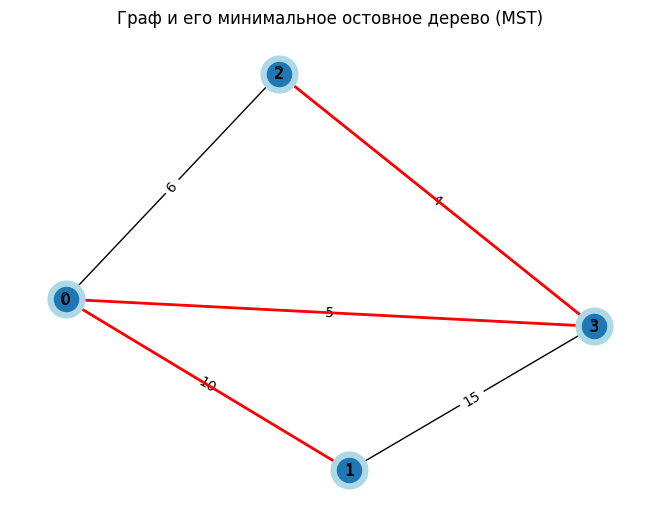

In [19]:
def main():
    # Пример: количество городов и дорог
    n = 5  # количество городов (вершин)
    edges = [
        (0, 1, 10),  # (город_1, город_2, стоимость)
        (0, 2, 6),
        (0, 3, 5),
        (1, 3, 15),
        (2, 3, 4)
    ]

    mst_edges, total_cost = kruskal(n, edges)

    print("Ребра минимального остовного дерева:")
    for u, v, weight in mst_edges:
        print(f"Город {u} - Город {v}, Стоимость: {weight}")
    print("Общая стоимость строительства:", total_cost)

    # Визуализация
    draw_graph(n, edges, mst_edges)

if __name__ == "__main__":
    main()


#Задача 5

5. Разработать программу решения задачи о максимальном потоке. Как (т.е. по каким маршрутам) послать максимально возможное количество грузов из начального пункта в конечный пункт, если пропускная способность путей между пунктами ограничена?

Импорт библиотек

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

Создаем граф

In [21]:
def create_graph():
    G = nx.DiGraph()  # Создаем ориентированный граф

    # Добавляем ребра и их пропускные способности
    G.add_edge('A', 'B', capacity=10)
    G.add_edge('A', 'C', capacity=5)
    G.add_edge('B', 'C', capacity=15)
    G.add_edge('B', 'D', capacity=10)
    G.add_edge('C', 'D', capacity=10)

    return G

In [22]:
def max_flow(G, source, sink):
    # Используем алгоритм Эдмондса-Карпи для нахождения максимального потока
    flow_value, flow_dict = nx.maximum_flow(G, source, sink)

    return flow_value, flow_dict

In [23]:
def draw_graph(G, flow_dict):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=10, font_color='black')

    # Рисуем веса ребер (пропускные способности)
    edge_labels = nx.get_edge_attributes(G, 'capacity')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Отображаем поток по ребрам
    for u, v in flow_dict.items():
        for target, flow in v.items():
            if flow > 0:
                edge_labels[(u, target)] = f"{edge_labels[(u, target)]} (ф: {flow})"
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title("Граф с максимальным потоком")
    plt.show()

Максимальный поток: 15
Путь из A в B с потоком 10
Путь из A в C с потоком 5
Путь из B в D с потоком 10
Путь из C в D с потоком 5


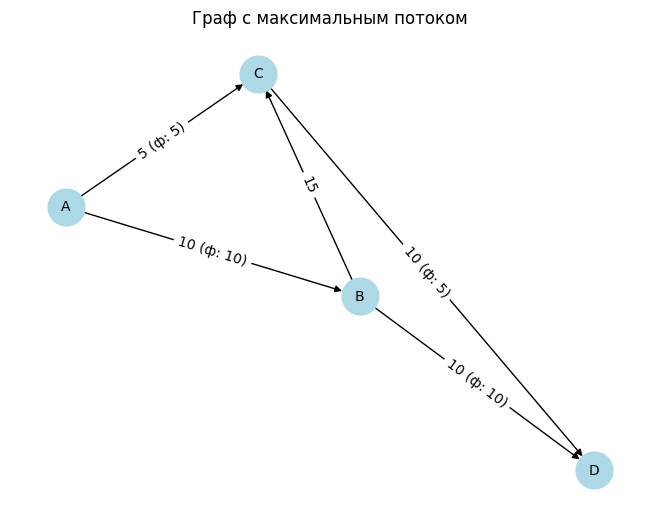

In [24]:
def main():
    G = create_graph()
    source = 'A'  # Начальный пункт
    sink = 'D'    # Конечный пункт

    flow_value, flow_dict = max_flow(G, source, sink)

    print("Максимальный поток:", flow_value)
    for u in flow_dict:
        for v in flow_dict[u]:
            if flow_dict[u][v] > 0:
                print(f"Путь из {u} в {v} с потоком {flow_dict[u][v]}")

    draw_graph(G, flow_dict)

if __name__ == "__main__":
    main()


#Задача 6

6. Разработать программу решения задачи о назначениях. Имеется некоторое число работ и некоторое число исполнителей. Любой исполнитель может быть назначен на выполнение любой (но только одной) работы, но с неодинаковыми затратами. Нужно распределить работы так, чтобы выполнить их с минимальными затратами.

In [25]:
import numpy as np
from scipy.optimize import linear_sum_assignment

In [26]:
def main():
    # Матрица затрат: строки - исполнители, столбцы - работы
    costs = np.array([
        [4, 2, 8],
        [2, 4, 5],
        [3, 7, 3]
    ])

    # Решаем задачу о назначениях
    row_ind, col_ind = linear_sum_assignment(costs)

    # Вычисляем минимальные затраты
    min_cost = costs[row_ind, col_ind].sum()

    # Выводим результаты
    print("Назначения:")
    for r, c in zip(row_ind, col_ind):
        print(f"Исполнитель {r + 1} назначен на работу {c + 1} с затратами {costs[r, c]}")

    print(f"\nМинимальные затраты: {min_cost}")

if __name__ == "__main__":
    main()


Назначения:
Исполнитель 1 назначен на работу 2 с затратами 2
Исполнитель 2 назначен на работу 1 с затратами 2
Исполнитель 3 назначен на работу 3 с затратами 3

Минимальные затраты: 7


#Задача 7

7. Разработать программу о назначении целей. Найти оптимальное распределение комплекта различного вооружения для поражения целей для нанесения максимального поражения противнику.

Оптимальное распределение вооружения по целям:
Вооружение 1 назначено на цель 2 с уроном 20
Вооружение 2 назначено на цель 3 с уроном 30
Вооружение 3 назначено на цель 1 с уроном 15

Максимальный общий урон: 65


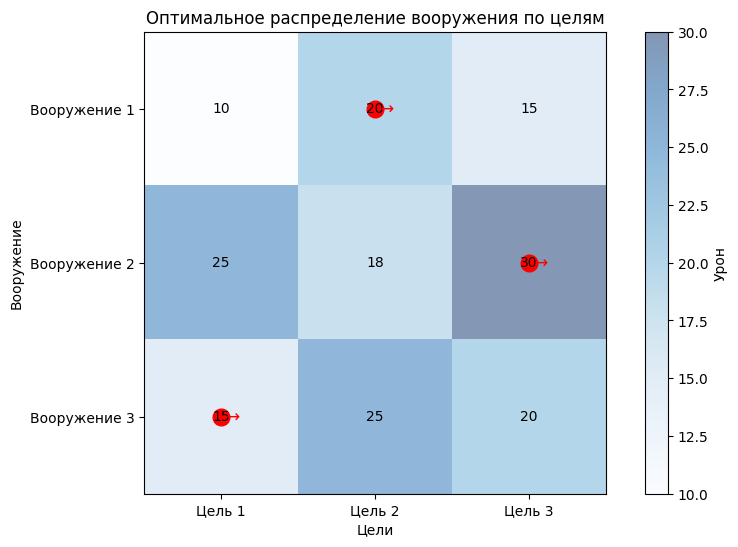

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment

def main():
    # Матрица урона: строки - вооружение, столбцы - цели
    damage_matrix = np.array([
        [10, 20, 15],  # Урон от первого типа вооружения
        [25, 18, 30],  # Урон от второго типа вооружения
        [15, 25, 20],  # Урон от третьего типа вооружения
    ])

    # Преобразуем матрицу урона в отрицательные значения
    cost_matrix = -damage_matrix

    # Выполняем алгоритм Венгера
    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    # Вычисляем максимальный урон
    max_damage = damage_matrix[row_ind, col_ind].sum()

    # Выводим распределение и общий урон
    print("Оптимальное распределение вооружения по целям:")
    for r, c in zip(row_ind, col_ind):
        print(f"Вооружение {r + 1} назначено на цель {c + 1} с уроном {damage_matrix[r, c]}")

    print(f"\nМаксимальный общий урон: {max_damage}")

    # Визуализация
    plt.figure(figsize=(10, 6))
    plt.imshow(damage_matrix, cmap='Blues', alpha=0.5)
    plt.colorbar(label='Урон')

    # Добавление аннотаций
    for i in range(damage_matrix.shape[0]):
        for j in range(damage_matrix.shape[1]):
            plt.text(j, i, damage_matrix[i, j], ha='center', va='center')

    # Отображение назначений
    for r, c in zip(row_ind, col_ind):
        plt.plot(c, r, 'ro', markersize=12)  # Красные точки для каждой линии назначения
        plt.text(c, r, ' →', color='red', fontsize=12, ha='left', va='center')

    plt.xticks(np.arange(damage_matrix.shape[1]), [f'Цель {i + 1}' for i in range(damage_matrix.shape[1])])
    plt.yticks(np.arange(damage_matrix.shape[0]), [f'Вооружение {i + 1}' for i in range(damage_matrix.shape[0])])
    plt.title('Оптимальное распределение вооружения по целям')
    plt.xlabel('Цели')
    plt.ylabel('Вооружение')

    plt.grid(False)  # Отключаем сетку для чистоты графика
    plt.show()

if __name__ == "__main__":
    main()


#Задача 8

8. Разработать программу решения задачи о загрузке (ранце).
Из заданного множества предметов со свойствами «стоимость» и «вес» требуется отобрать некое число предметов таким образом, чтобы получить максимальную суммарную стоимость при одновременном соблюдении ограничения на суммарный вес.


In [35]:
def knapsack(weights, values, capacity):
    n = len(values)
    # Создаем таблицу для хранения максимальных значений
    K = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]

    # Заполняем таблицу
    for i in range(1, n + 1):
        for w in range(capacity + 1):
            # Если вес текущего предмета больше, чем текущая вместимость, пропускаем его
            if weights[i - 1] <= w:
                # Берем максимум из 2 случаев:
                # 1. Текущий предмет не включен
                # 2. Текущий предмет включен
                K[i][w] = max(K[i - 1][w], K[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                # Если предмет слишком тяжелый, он не может быть включен
                K[i][w] = K[i - 1][w]

    return K[n][capacity]

# Пример использования
if __name__ == "__main__":
    # Примерные данные: вес и стоимость предметов
    weights = [2, 3, 4, 5]
    values = [3, 4, 5, 6]
    capacity = 5

    max_value = knapsack(weights, values, capacity)
    print(f"Максимальная стоимость, которую можно получить: {max_value}")


Максимальная стоимость, которую можно получить: 7


#Задача 9

9. Разработать программу решения задачи о кратчайшем пути. Как кратчайшим путем (с наименьшим расходом топлива и времени, т.е. дешевле) попасть из пункта А в пункт Б?

In [39]:
import heapq

def dijkstra(graph, start):
    # Инициализация расстояний
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    priority_queue = [(0, start)]

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        # Узел может быть уже обработан
        if current_distance > distances[current_node]:
            continue

        # Обработка соседних узлов
        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight

            # Если найдено более короткое расстояние
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances

# Пример графа в виде словаря
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1},
    'D': {'B': 5, 'C': 1}
}

# Использование алгоритма
start_node = 'A'
distances = dijkstra(graph, start_node)

# Вывод кратчайших расстояний от стартовой точки
for node, distance in distances.items():
    print(f"Расстояние от {start_node} до {node}: {distance}")


Расстояние от A до A: 0
Расстояние от A до B: 1
Расстояние от A до C: 3
Расстояние от A до D: 4


#Задача 10

10. Разработать программу размещения локальной сети. Найти оптимальную конфигурацию прокладки сетевого кабеля и коммутационного оборудования.

In [40]:
import networkx as nx
import matplotlib.pyplot as plt

In [41]:
def create_network(num_devices, connections):
    G = nx.Graph()

    # Добавляем узлы
    for i in range(num_devices):
        G.add_node(f'Device {i+1}')

    # Создаем связи (сетевая топология)
    for conn in connections:
        G.add_edge(conn[0], conn[1], weight=1)  # weight может обозначать расстояние, стоимость и т.д.

    return G

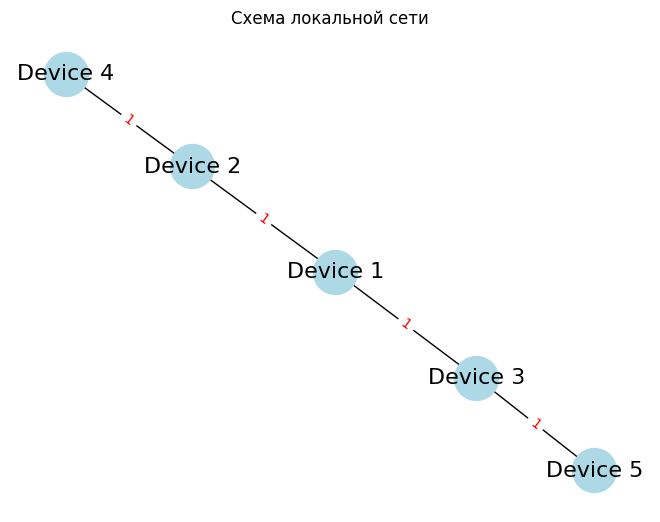

In [42]:
def draw_network(G):
    pos = nx.spring_layout(G)  # Для расположения узлов
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=16)

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    plt.title("Схема локальной сети")
    plt.show()

# Пример использования
num_devices = 5  # Количество устройств
connections = [('Device 1', 'Device 2'), ('Device 1', 'Device 3'), ('Device 2', 'Device 4'), ('Device 3', 'Device 5')]

network = create_network(num_devices, connections)
draw_network(network)
